# Step 1: Reading a File for Audio Signals

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

loading the audio file

In [ ]:
freq_sample, sig_audio = wavfile.read("/content/sample-audio.wav")

In [ ]:
# visualizing Signal Data Type, Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')


Shape of Signal: (146432, 2)
Signal Datatype: int16
Signal duration: 3.32 seconds


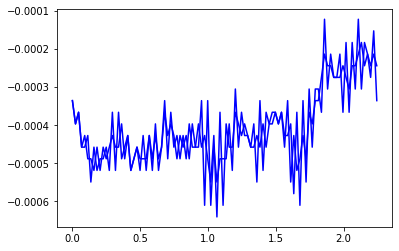

In [ ]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)
plt.plot(time_axis, pow_audio_signal, color='blue')

# Step 2: Transforming Audio Frequencies

The Fourier Transform is a tool that breaks a waveform (a function or signal) into an alternate representation, characterized by the sine and cosine funcitons of varying frequencies. The Fourier Transform shows that any waveform can be re-written as the sum of sinusoidals.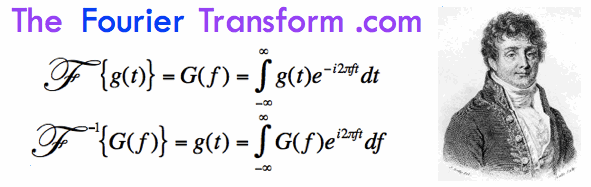

In [ ]:
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# using the Fourier Transform (FFT) to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)

In [ ]:
# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)

In [ ]:
# Adjusting the Furier transformed signal for both even and odd cases
if sig_length % 2:
  signal_freq[1:transform_len] *= 2
else:
  signal_freq[1:transform_len-1] *= 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


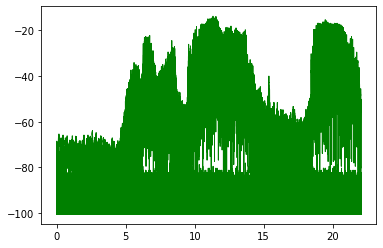

In [ ]:
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)

# Step 3: Extracting Features from Speech

In [ ]:
# Installing and importing necessary libraries
! pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=25b3710546d72c92b999f0de884bca9b70ddd6939c02e2ee420a278ba8bc418f
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
# importing (mfcc & logfbank) two good algorithm to separate the high and low frequency signals.
from python_speech_features import mfcc, logfbank 

In [ ]:
sampling_freq, sig_audio = wavfile.read("/content/mahmud11.wav")

In [ ]:
# taking the first 15000 samples from the signal for analysis
sig_audio = sig_audio[:15000]

In [ ]:
# Using MFCC to extract features from the signal
mfcc_feat = mfcc(sig_audio, sampling_freq)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])


MFCC Parameters
Window Count = 186
Individual Feature Length = 13


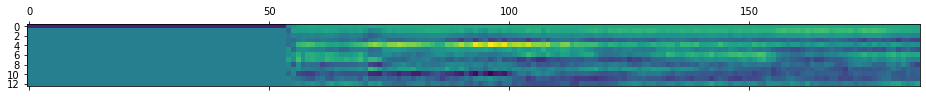

In [ ]:
mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)

The first horizontal yellow lines below every segment are the fundamental frequency and at their strongest. Above the yellow line are the harmonics that share the same frequency distance between them

In [ ]:
# Generating filter bank features
fb_feat = logfbank(sig_audio, sampling_freq)
print('\nFilter bank\nWindow Count =', fb_feat.shape[0])
print('Individual Feature Length =', fb_feat.shape[1])


Filter bank
Window Count = 186
Individual Feature Length = 26


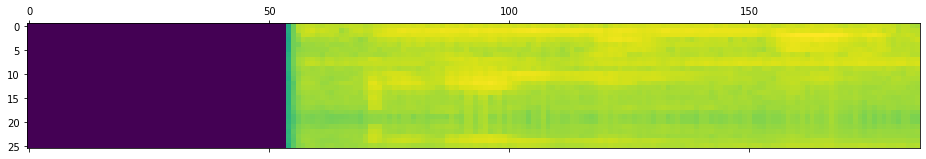

In [ ]:
fb_feat = fb_feat.T
plt.matshow(fb_feat)

# Step 4: Recognizing Spoken Words

In [ ]:
! pip install SpeechRecognition
! pip install pipwin

     |████████████████████████████████| 32.8 MB 193 kB/s 
     |████████████████████████████████| 97 kB 8.1 MB/s 
     |████████████████████████████████| 1.0 MB 61.2 MB/s 
  Created wheel for pipwin: filename=pipwin-0.5.1-py2.py3-none-any.whl size=8791 sha256=7776a6efacc6a00a9461bab032c25cc52236783443397102de8e5919296e3f33
  Stored in directory: /root/.cache/pip/wheels/4e/f2/06/9024048eece9a22afc7a013395d6de2d345f56185095550d4c
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=26000 sha256=27f633f650f1c9d572c0cd4af22c4e66c040f13c5813ade3515484836b20941f
  Stored in directory: /root/.cache/pip/wheels/2a/80/ac/dcd2bdbd03dd2b7b7e2bf3e5afbda6a1ab7935bbce314969da
Successfully built pipwin pyjsparser
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio
import speech_recognition as speech_recog

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
libportaudiocpp0 is already the newest version (19.6.0-1).
portaudio19-dev is already the newest version (19.6.0-1).
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# to store input Creating a recording object
rec = speech_recog.Recognizer()

In [ ]:
# to check availabiity of microphones Importing the microphone class from sounddevice/pyaudio 
from pyaudio import Microphone
mic_test = speech_recog.Microphone()

ImportError: ignored